# Approximation of the kernel matrix.

Author: <alberto.suarez@uam.es>

In this notebook we illustrate the quality of the approximation to the kernel matrix using random features of different types (RBF, Matérn) and Nystöm features.

Note that even the best results for classification need not be obtained by the method that gives the best approximation to the kernel matrix. The reason is that the approximation can have a regularization effect that may improve the accuracy of the predictions on the test set.

In [1]:
%load_ext autoreload
%autoreload 2

## Load necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn import datasets
from sklearn.kernel_approximation import RBFSampler
from sklearn.gaussian_process.kernels import Matern
import kernel_approximation as ka


# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


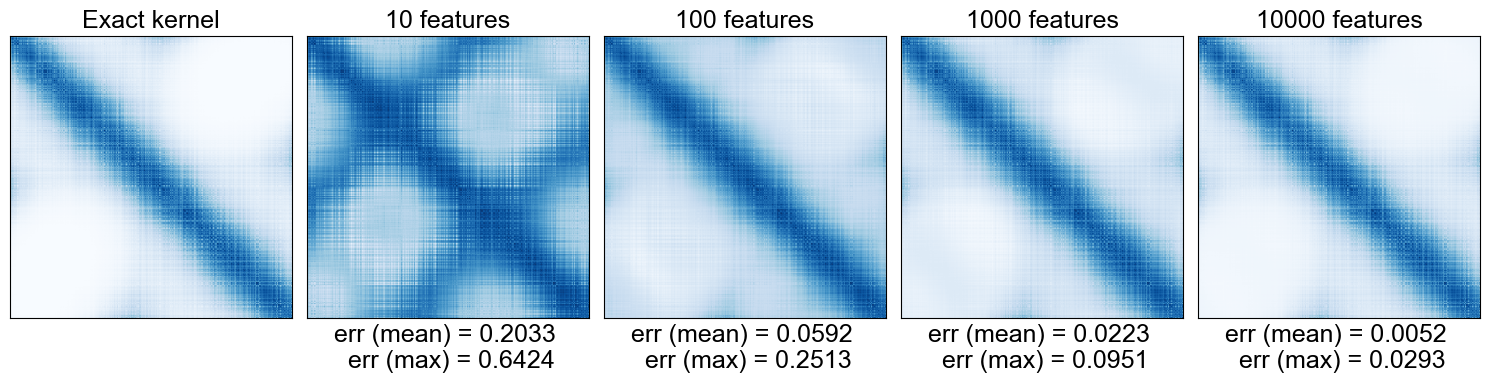

In [2]:
## Generate data
# 3-D data
n_instances = 1000
X, t = datasets.make_s_curve(n_instances, noise=0.1)
X = X[np.argsort(t)]

# Reshape if necessary
if (X.ndim == 1):
    X = X[:, np.newaxis]
    
# RBF kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel function
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

## Create an instance of the random features object
rbf_sampler = ka.RandomFeaturesSamplerRBF(sigma)

## Plot the approximation to the kernel matrix
n_random_features = [10, 100, 1000, 10000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    rbf_sampler,
    n_random_features
)

# of features =  10
# of features =  100
# of features =  1000
# of features =  10000


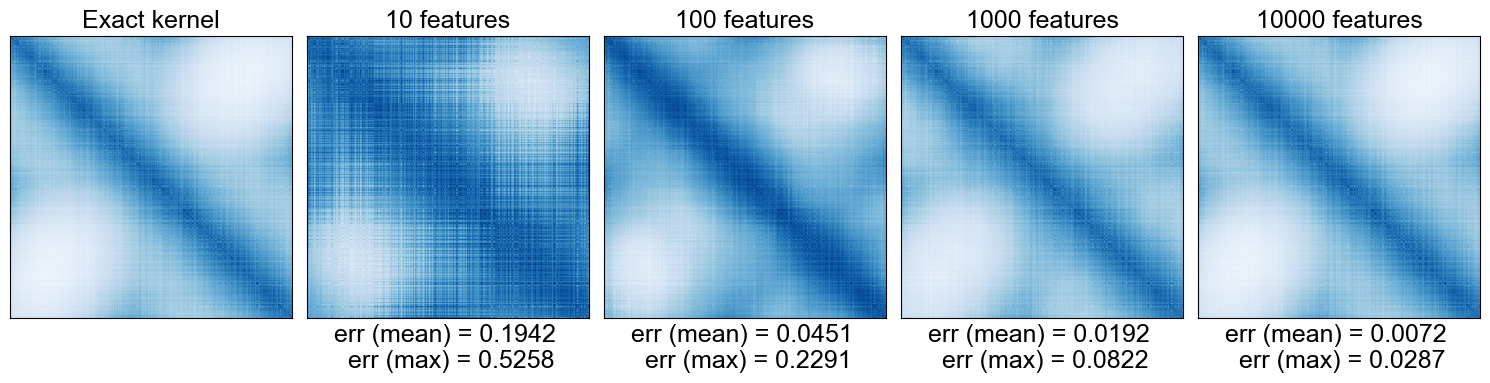

In [3]:
length_scale = 3.0
nu = 0.5

kernel_matern = Matern(length_scale=length_scale, nu=nu) 

def kernel(X, Y):
    return kernel_matern(X, Y)

matern_sampler = ka.RandomFeaturesSamplerMatern(length_scale, nu)    

n_random_features = [10, 100, 1000, 10000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    matern_sampler,
    n_random_features
)

# of features =  10
# of features =  100
# of features =  1000


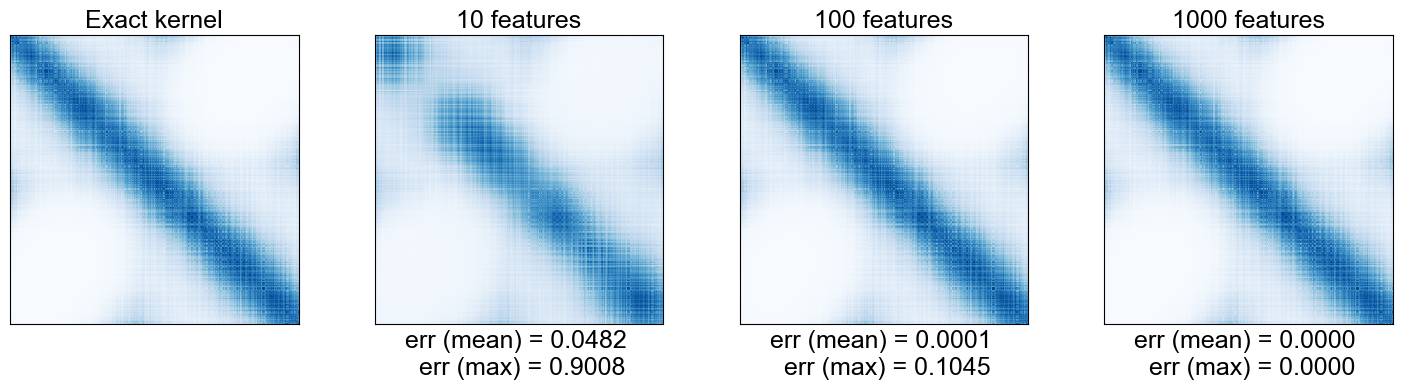

In [4]:
# Kernel parameters 
sigma = 1.0
gamma = 1.0 / (2.0 * sigma**2)

# Kernel matrix
def kernel(X, Y):
    return rbf_kernel(X, Y, gamma=gamma) 

nystroem_sampler = ka.NystroemFeaturesSampler(kernel)

n_nystroem_features = [10, 100, 1000]

ka.demo_kernel_approximation_features(
    X, 
    kernel, 
    nystroem_sampler,
    n_nystroem_features
)

## Exercises
1. Implement the incomplete methods in *kernel_approximation.py*
2. Comment on the values of the error for the different approximations, and their dependence with the number of sampled features.
3. (Extra point) Determine de dependence of the mean error with the number of features for the different random feature models. Provide an explanation of this behavior.

As we increase the number of features (whether Random RBF, Random Matern or Nyström), the approximation error decreases. This is evident from both the mean error and the maximum error metrics. With more features, the approximated kernel matrix more closely matches the exact kernel.

However, it is important to note that a lower error in approximating the kernel matrix does not automatically translate into better classification performance. In some cases, the approximation can have a regularization effect that may actually improve generalization.

For the three methods, let us now argue about the order of magnitude of the errors as a function of the number of features:

| Mean error | 10 features | 100 features | 1,000 features | 10,000 features |
|-|:-:|:-:|:-:|:-:|
| |
|Random RBF   | $\approx 2\cdot 10^{-1}$ | $\approx 6\cdot 10^{-2}$ | $\approx 2\cdot 10^{-2}$ | $\approx 5\cdot 10^{-3}$ |
|Random Matern| $\approx 2\cdot 10^{-1}$ | $\approx 5\cdot 10^{-2}$ | $\approx 2\cdot 10^{-2}$ | $\approx 7\cdot 10^{-3}$ |
|Nyström      | $\approx 5\cdot 10^{-2}$ | $\approx 1\cdot 10^{-4}$ | $\approx  < 10^{-4}$ | --- |

| Max error | 10 features | 100 features | 1,000 features | 10,000 features |
|-|:-:|:-:|:-:|:-:|
| |
|Random RBF   | $\approx 6\cdot 10^{-1}$ | $\approx 3\cdot 10^{-1}$ | $\approx 1\cdot 10^{-1}$ | $\approx 3\cdot 10^{-2}$ |
|Random Matern| $\approx 5\cdot 10^{-1}$ | $\approx 2\cdot 10^{-1}$ | $\approx 8\cdot 10^{-2}$ | $\approx 3\cdot 10^{-2}$ |
|Nyström      | $\approx 9\cdot 10^{-1}$ | $\approx 1\cdot 10^{-1}$ | $\approx  < 10^{-4}$ | --- |

* Random RBF: as the number of features increase by a factor of 10, the mean error decreases by a factor of $\approx 3.5$ and the maximum error decreases by a factor of $\approx 2.8$.

* Random Matern: as the number of features increase by a factor of 10, the mean error decreases by a factor of $\approx 3.1$ and the maximum error decreases by a factor of $\approx 2.6$.

* Nyström: as the number of features increase by a factor of 10, the mean error decreases by a factor of $\approx 500$ and the maximum error decreases by a factor of $\approx 10$.

For both random methods, it seems that the dependence of the error in terms of the number of features $N$ is $\sim \frac{1}{\sqrt{N}}$ as expected since they are both Monte Carlo methods (if we increase the number of features by a factor of $10$, the error will decrease by a factor of $\sqrt{10} \approx 3.1$, the results we have obtained although a constant may be needed).

However, for the Nyström method, the dependence must be a greater power of the number of features used.

## Notes
1. For the implementation of the Nyström method, the following functions are useful:
* numpy.linalg.pinv [ https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html ].
* scipy.linalg.sqrtm  [ https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.sqrtm.html ].
